# Monthly enquiry - aggregation investigation

### monthly insight - aggregated data groupby Member-id and Type

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
me = pd.read_csv("Monthly_enquiry.csv")
me.head()

,Member_id,Type,Date
0,a122,Private,1/09/2016
1,ax88,Dealer,1/09/2016
2,a123,Private,1/09/2016
3,a123,Private,1/09/2016
4,a124,Private,1/09/2016


In [3]:
me=me.groupby(['Member_id ', 'Type'])['Date'].apply(lambda x: pd.Series(list(x))).unstack()
me.head()

0          1          2          3          4   \
Member_id  Type                                                             
a122       Dealer   2/09/2016        NaN        NaN        NaN        NaN   
           Private  1/09/2016  1/09/2016  1/09/2016  1/09/2016  1/09/2016   
a123       Dealer   2/09/2016  3/09/2016  3/09/2016  3/09/2016  3/09/2016   
           Private  1/09/2016  1/09/2016  3/09/2016  3/09/2016        NaN   
a124       Private  1/09/2016        NaN        NaN        NaN        NaN   

                           5          6          7    8    9  ...    27   28  \
Member_id  Type                                               ...              
a122       Dealer         NaN        NaN        NaN  NaN  NaN ...   NaN  NaN   
           Private  1/09/2016  1/09/2016  2/09/2016  NaN  NaN ...   NaN  NaN   
a123       Dealer   3/09/2016        NaN        NaN  NaN  NaN ...   NaN  NaN   
           Private        NaN        NaN        NaN  NaN  NaN ...   NaN  NaN   
a124       Private        NaN        NaN        NaN  NaN  NaN ...   NaN  NaN   

                     29   30   31   32   33   34   35   36  
Member_id  Type                                             
a122       Dealer   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
           Private  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
a123       Dealer   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
           Private  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
a124       Private  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 37 columns]

developing a function to convert all string date to day.

In [4]:
# converting string cells to date format timestap in seconds
def convert_date3(datestring):
    ''' This function takes string date and return a float number'''
    if pd.notna(datestring):
        d = datetime.strptime(datestring, '%d/%m/%Y')
        return d.day

Applying convert_date function to the dataframe

In [5]:
me=me.applymap(convert_date3)
me.head()

0    1    2    3    4    5    6    7   8   9  ...  27  28  \
Member_id  Type                                                   ...           
a122       Dealer    2  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN ... NaN NaN   
           Private   1  1.0  1.0  1.0  1.0  1.0  1.0  2.0 NaN NaN ... NaN NaN   
a123       Dealer    2  3.0  3.0  3.0  3.0  3.0  NaN  NaN NaN NaN ... NaN NaN   
           Private   1  1.0  3.0  3.0  NaN  NaN  NaN  NaN NaN NaN ... NaN NaN   
a124       Private   1  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN ... NaN NaN   

                    29  30  31  32  33  34  35  36  
Member_id  Type                                     
a122       Dealer  NaN NaN NaN NaN NaN NaN NaN NaN  
           Private NaN NaN NaN NaN NaN NaN NaN NaN  
a123       Dealer  NaN NaN NaN NaN NaN NaN NaN NaN  
           Private NaN NaN NaN NaN NaN NaN NaN NaN  
a124       Private NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 37 columns]

calculating the duration of search or view or lead. For how many seconds, the user is searching or viewing in the carsales website.


In [6]:
mx= me.max(axis=1)
mn=me.min(axis=1)
duration=mx-mn

calculating new columns as the number of search, view and leads

In [7]:
count = me.count(axis = 1)

adding duration and count to dataframe

In [8]:
me['duration']=duration
me['count']=count
me=me[['duration','count']]
me=me.unstack()
me.head()

duration          count        
Type         Dealer Private Dealer Private
Member_id                                 
a122            0.0     1.0    1.0     8.0
a123            1.0     2.0    6.0     4.0
a124            NaN     0.0    NaN     1.0
a567            NaN     0.0    NaN     2.0
a569            NaN     0.0    NaN     2.0

replacing misisng values with zero after calculating duration and count of observation in each row

In [9]:
# converting multi-index columns to single-index ones.
me['NDealer'] = me[('count', 'Dealer')]
me['NPrivate'] = me[('count', 'Private')]
me['DDealer'] = me[('duration', 'Dealer')]
me['DPrivate'] = me[('duration', 'Private')]
# filtering multi-index columns and eeping single-index
me = me.iloc[:,4:]
me.head()

,NDealer,NPrivate,DDealer,DPrivate
Type,,,,
Member_id,,,,
a122,1.0,8.0,0.0,1.0
a123,6.0,4.0,1.0,2.0
a124,NaN,1.0,NaN,0.0
a567,NaN,2.0,NaN,0.0
a569,NaN,2.0,NaN,0.0


For duration columns, 1 means the member was done the enquiry in 1 day. zero means that no enquiry is done.

In [10]:
me['DDealer']=me['DDealer']+1
me['DPrivate']=me['DPrivate']+1
me=me.fillna(0)

In [11]:
me.head()

,NDealer,NPrivate,DDealer,DPrivate
Type,,,,
Member_id,,,,
a122,1.0,8.0,1.0,2.0
a123,6.0,4.0,2.0,3.0
a124,0.0,1.0,0.0,1.0
a567,0.0,2.0,0.0,1.0
a569,0.0,2.0,0.0,1.0


Descriptive statistics for each column

In [12]:
me.describe()

,NDealer,NPrivate,DDealer,DPrivate
Type,,,,
count,191.000000,191.000000,191.000000,191.000000
mean,0.465969,0.900524,0.403141,0.680628
std,0.972054,2.740640,0.571048,0.613524
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,10.000000,37.000000,4.000000,5.000000


#### Insights from monthly enquiries

<Figure size 432x288 with 0 Axes>

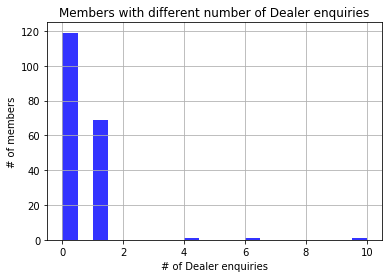

In [57]:
fig = plt.figure()
me.hist(bins=20, column='NDealer', alpha=0.8, color='B')
plt.title('Members with different number of Dealer enquiries')
plt.xlabel('# of Dealer enquiries')
# plt.xlim(0,10)
plt.ylabel('# of members')
plt.savefig('NDealer.png')

<Figure size 432x288 with 0 Axes>

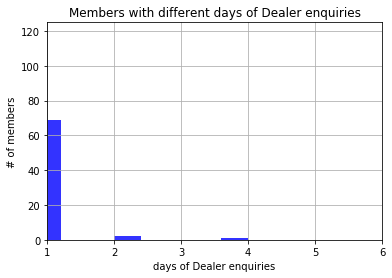

In [65]:
fig = plt.figure()
me.hist(bins=10, column='DDealer', alpha=0.8, color='B')
plt.title('Members with different days of Dealer enquiries')
plt.xlabel('days of Dealer enquiries')
plt.ylabel('# of members')
plt.xlim(1,6)
plt.savefig('DDealer.png')

<Figure size 432x288 with 0 Axes>

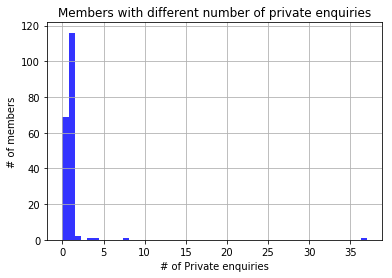

In [60]:
fig = plt.figure()
me.hist(bins=50, column='NPrivate', alpha=0.8, color='B')
plt.title('Members with different number of private enquiries')
plt.xlabel('# of Private enquiries')
plt.ylabel('# of members')
# plt.xlim(0,10)
plt.savefig('NPrivate.png')

<Figure size 432x288 with 0 Axes>

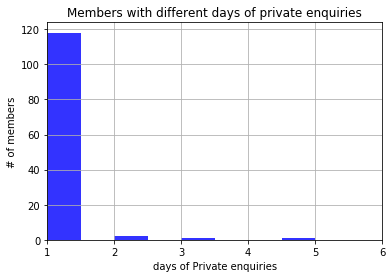

In [66]:
fig = plt.figure()
me.hist(bins=10, column='DPrivate', alpha=0.8, color='B')
plt.title('Members with different days of private enquiries')
plt.xlabel('days of Private enquiries')
plt.ylabel('# of members')
plt.xlim(1,6)
plt.savefig('DPrivate.png')

In [45]:
me['Ntotal']=me['NPrivate']+me['NDealer']

<Figure size 432x288 with 0 Axes>

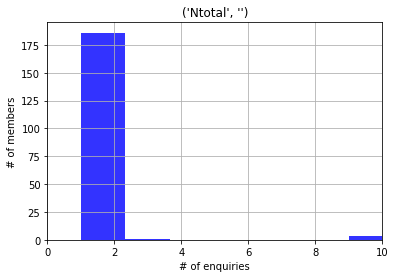

In [46]:
fig = plt.figure()
me.hist(bins=30, column='Ntotal', alpha=0.8, color='B')
fig.suptitle(' ')
plt.xlabel('# of enquiries')
plt.ylabel('# of members')
plt.xlim(0,10)
plt.savefig('Ntotal.png')

## Pie chart of different enquiries

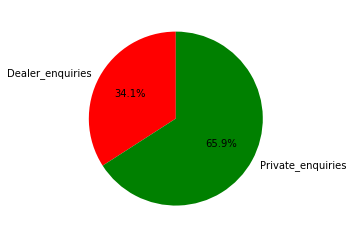

In [56]:
enquiries = [me.NDealer.sum(), me.NPrivate.sum()]
labeling = ['Dealer_enquiries', 'Private_enquiries']
colors = ['r', 'g']
plt.pie(enquiries, labels=labeling, colors=colors, startangle=90, autopct='%.1f%%')
plt.savefig('piechart.png')